In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("DataSet.csv")
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [3]:
df.columns.tolist()

['title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent',
 'in_balanced_dataset']

In [4]:
df.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
in_balanced_dataset        0
dtype: int64

In [5]:
#removing the "in_balanced_dataset" column as it is irrelavant as for now
df.drop(columns=['in_balanced_dataset'],inplace =True)

In [6]:
# Let us remove the columns which are not necessary for our analysis
#for e.g. 'has_company_logo' etc

In [7]:
#but before that let us dive a little more deep into the null values issue

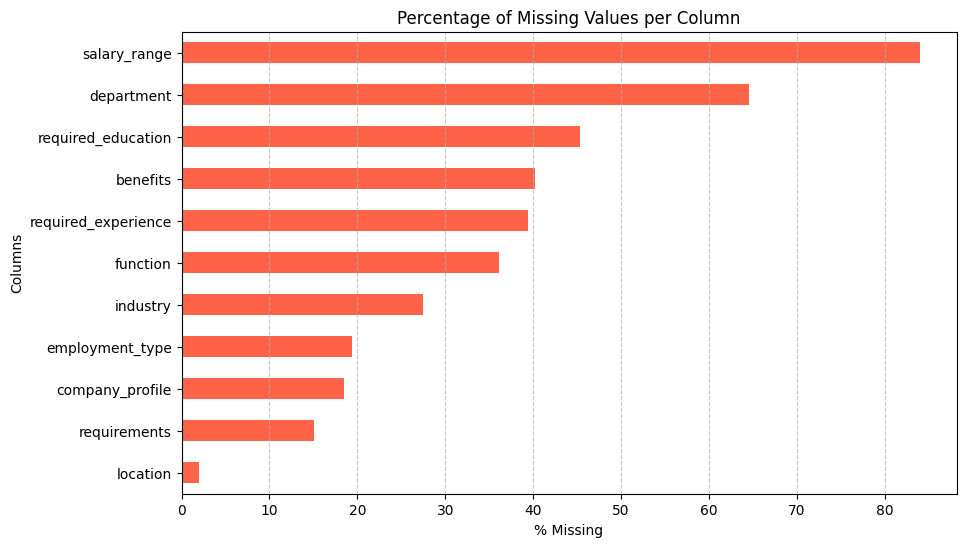

In [8]:
import matplotlib.pyplot as plt

# Calculate % of missing values in each of the colummns
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Plot it
plt.figure(figsize=(10, 6))
missing_percent.plot(kind='barh', color='tomato')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('% Missing')
plt.ylabel('Columns')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [9]:
#salary range : more than 80% null values
#these cannot be interploated or terminated, so we can drop them for context
#(as salary range might not be important factor, fake job postings can put up any salary irregardless)

In [10]:
#department : more than 60 % null values
#now this is an important factors ot consider as it might help us answer questions like which dept post most fake jobs
#so we can impute them

In [11]:
#'telecommuting', 'has_company_logo', 'has_questions' are also some not ver important for consideration now

In [12]:
df.drop(columns=['salary_range', 'telecommuting', 'has_company_logo', 'has_questions'], inplace = True)


In [13]:
# Fill low % NaNs with safe defaults
df['location'].fillna("Unknown", inplace=True)
df['company_profile'].fillna("No profile", inplace=True)
df['requirements'].fillna("Not specified", inplace=True)
df['employment_type'].fillna("Other", inplace=True)
df['required_experience'].fillna("Not specified", inplace=True)
df['required_education'].fillna("Not specified", inplace=True)
df['industry'].fillna("Not specified", inplace=True)
df['function'].fillna("Other", inplace=True)
df['department'].fillna("Other", inplace=True)
df['benefits'].fillna("Not disclosed", inplace=True)



In [14]:
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [20]:
from bs4 import BeautifulSoup
import re

# Define a cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove newline, tab, extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# List of columns to clean
text_cols = ['company_profile', 'description', 'requirements', 'benefits']

# Apply cleaning to each column
for col in text_cols:
    df[col] = df[col].apply(clean_text)


C:\Users\lenovo\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [34]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    
    # Step 1: Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Step 2: Remove URLs (http, https, www) and email addresses
    text = re.sub(r'http\S+|www.\S+|[\w\.-]+@[\w\.-]+', '', text)
    
    # Step 3: Remove "href=" and similar leftover patterns
    text = re.sub(r'href\S*', '', text)
    
    # Step 4: Remove extra whitespace, tabs, newlines
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Columns to clean
text_cols = ['company_profile', 'description', 'requirements', 'benefits']

# Apply cleaning to each column
for col in text_cols:
    df[col] = df[col].apply(clean_text)

In [38]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not disclosed,Other,Internship,Not specified,Not specified,Marketing,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you: Your key responsibili...,What you will get from us Through being part o...,Full-time,Not Applicable,Not specified,Marketing and Advertising,Customer Service,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Other,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not disclosed,Other,Not specified,Not specified,Not specified,Other,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f
4,Bill Review Manager,"US, FL, Fort Worth",Other,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review Manager LOCATION...,QUALIFICATIONS: RN license in the State of Tex...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f


In [15]:
#chcking for class imbalance problem

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'fraud' column
fraud_counts = df['fraudulent'].value_counts().sort_index()

# Define labels based on your data (0: Not Fraud, 1: Fraud)
labels = ['Not Fraud', 'Fraud']

fraud_counts

f    17014
t      866
Name: fraudulent, dtype: int64

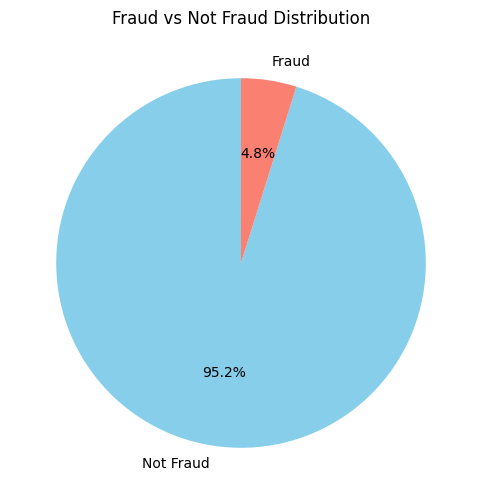

In [17]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Fraud vs Not Fraud Distribution')
plt.show()


In [39]:
# Save the cleaned and balanced dataset
df.to_csv('data1.csv', index=False)